## Project Name: Telecom Customer Churn Prediction: Classification Problem

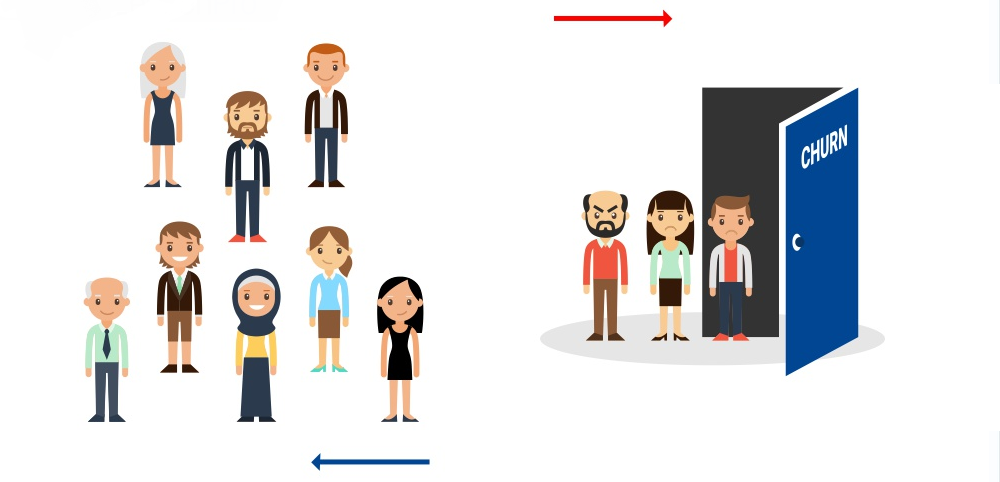

### Objectif : 
The aim of this project is to create a predictive model to identify the set of customers who have a high probability of unsubscribing from the service now or in the near future using Personal Details, Demographic Information, Pricing and the Plans they have subscribed to. A secondary objective is to identify the features of the Independent Variables (also known as “X” or “Predictors”) which cause a great impact on the Dependent Variable (“Y” or “Outcome”) that causes a customer to unsubscribe.

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the global default size of matplotlib figures
plt.rc('figure', figsize=(8, 6))

# size of matplotlib figures that contain subplots
fizsize_with_subplots = (8, 6)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

pd.pandas.set_option("display.max_columns",None)

## Data Exploration/Analysis Phase

Main aim is to understand more about the data, to apply data preprocessing and preparation techniques in order to obtain clean data.

### Checklist

* **Target variable (binary):** Churn: 26.45% Yes, 73.55% No.

* **Rows & columns:** 7043 rows, 21 columns.

* **Type of variables:** quantitative: 3, qualitative: 18.

* **Missing values:** 

    - Only `TotalCharges` column with 11 null values. 

In [2]:
# import the data 
df = pd.read_csv('customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [4]:
# check total number of rows and columns in our dataset
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  7043
Number of columns:  21


In [5]:
# data details 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


From the above data info we can see that `totalcharges` is in object type although it is a numerical feature so let's convert it into numeric variable.

In [6]:
# convert 'totalcharges' column to the correct types
df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors='coerce')

`seniorcitizen` column is supposed to be in object type since it is a categorical variable.

In [7]:
# replace values
df["seniorcitizen"] = df["seniorcitizen"].replace({1:"Yes",0:"No"})

In [8]:
# check data types
df.dtypes.value_counts()

object     18
float64     2
int64       1
dtype: int64

In [9]:
# data description
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.0,25.0,0.0,9.0,29.0,55.0,72.0
monthlycharges,7043.0,65.0,30.0,18.0,36.0,70.0,90.0,119.0
totalcharges,7032.0,2283.0,2267.0,19.0,401.0,1397.0,3795.0,8685.0


In [10]:
# drop irrelevant features
if 'customerid' in df.columns:
    #df.drop('customerid', axis=1, inplace=True)
    df.drop('customerid', axis='columns', inplace=True)

### Check for missing values

In [11]:
df.isnull().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

Here the `totalcharges` column has 11 missing values.

In [12]:
df.loc[df.totalcharges.isnull(), ['seniorcitizen','tenure','totalcharges','churn']]

,seniorcitizen,tenure,totalcharges,churn
488,No,0,NaN,No
753,No,0,NaN,No
936,No,0,NaN,No
1082,No,0,NaN,No
1340,No,0,NaN,No
3331,No,0,NaN,No
3826,No,0,NaN,No
4380,No,0,NaN,No
5218,No,0,NaN,No
6670,No,0,NaN,No


From the above table we deduct that customers with null totalcharges seems to be new customers. So here we can just replace NaN values with 0. 

In [13]:
df.totalcharges.fillna(0, inplace=True)

### Check for duplicates

In [14]:
df.duplicated().sum()

22

We have 22 duplicated rows, so we're going to delete them.

In [15]:
# drop duplicated rows in dataset
df.drop_duplicates(inplace=True, ignore_index=True)

### Target variable: churn

In [16]:
df.churn.value_counts()

No     5164
Yes    1857
Name: churn, dtype: int64

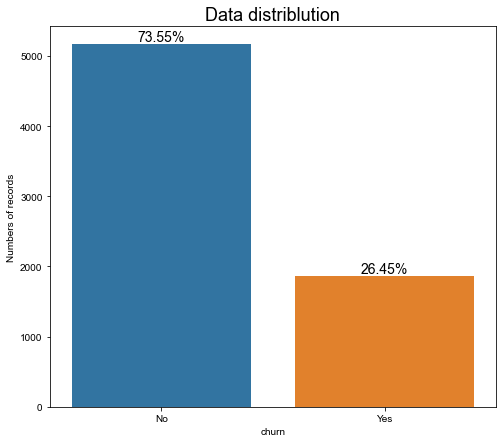

In [17]:
fig=plt.figure(figsize=(8,7))
p= sns.countplot(x='churn', data=df)
ax=plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height+2, '{:.2f}%'.format(100*(height/df.shape[0])),
            fontsize=14,ha='center',va='bottom')
sns.set(font_scale=1.5)
ax.set_ylabel("Numbers of records")
plt.title("Data distriblution");

**Observations :** 

* As we can see from the plot above, about 74% of customers didn't churn and 26% end up churning and our dataset seems to be imbalenced.

### Numerical data analysis

Now we are going to do further analysis on our data, so first of all let's examine the numerical features in the dataset.

In [18]:
# list of numerical columns
numeric_features = df.select_dtypes(include=[np.number]).columns.to_list()
numeric_features

['tenure', 'monthlycharges', 'totalcharges']

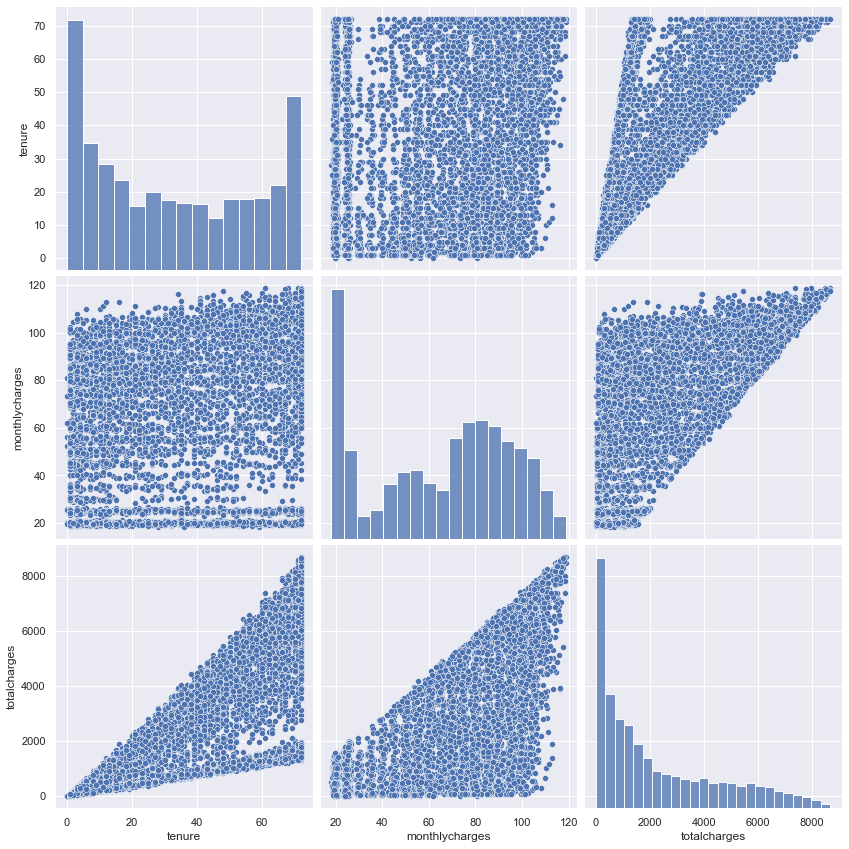

In [19]:
# plot pairplot for numerical features
sns.set()
sns.pairplot(df[numeric_features], size = 4)
plt.show()

**Observations :**

From the pairplot above we can see that:

* `tenure` follow a bimodal distribution. First bulk represents the most of customer who still be new and haven't been in the company for a long time.The second one represents the older customers who have been in the company for the longer time.
* `monthlycharges` as well is roughly bimodal distributed and show that most customers have the lowest monthly charges.
* `totalcharges` is right skewed, there are lot of customers with lower total charges, but fewer with very large balance.
* `tenure` and `totalcharges` seems to be strongly linear.

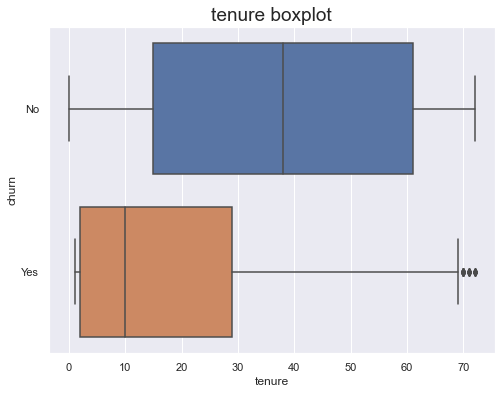

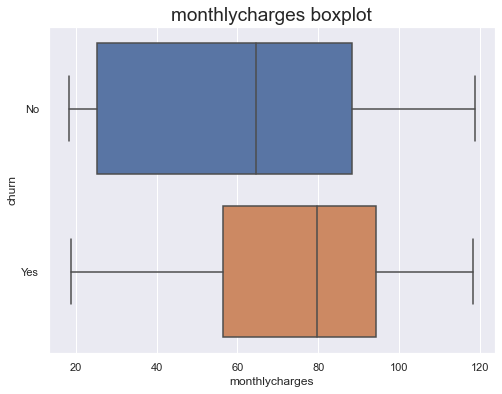

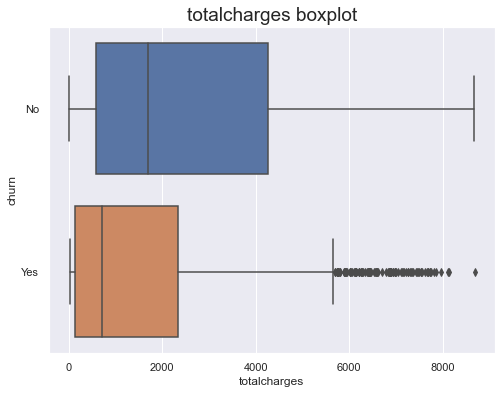

In [20]:
# plot boxplot for each numerical variable
for feature in numeric_features:
    sns.boxplot(x=feature, y='churn', data=df, orient='h')
    plt.title('{} boxplot'.format(feature), fontsize=19)
    plt.show()

**Observations:**
* By looking at the graph of montly charges it seems that the more charges the customers have the more likely they would churn.
* From the boxplot above we see that 75% from chrned customers have the tenure less than 30 and monthly charges more than 57. 

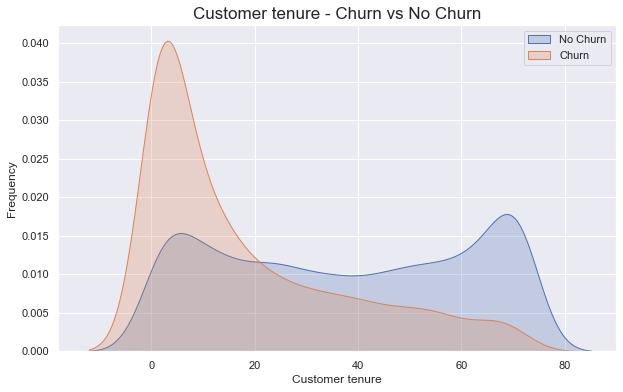

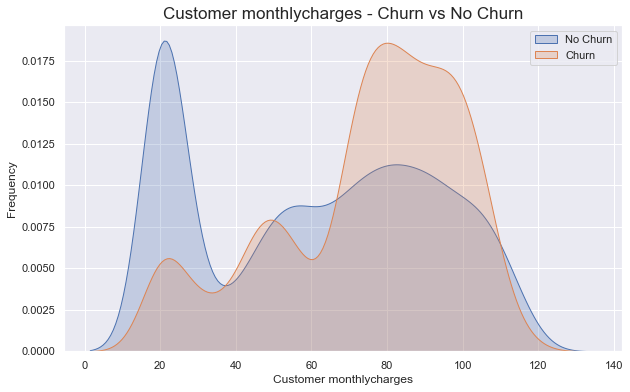

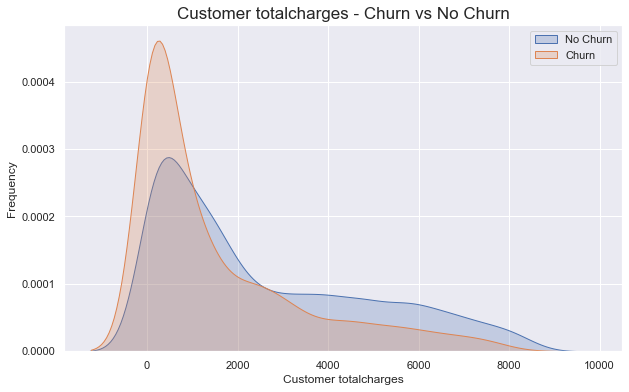

In [21]:
# plot kde for each of the numerical variable 
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    ax=sns.kdeplot(df.loc[(df['churn']=='No'),feature], shade=True, label='No Churn')
    ax=sns.kdeplot(df.loc[(df['churn']=='Yes'),feature], shade=True, label='Churn')
    ax.set(xlabel='Customer {}'.format(feature),ylabel='Frequency')  
    ax.legend()
    plt.title('Customer {} - Churn vs No Churn'.format(feature), fontsize=17)
    plt.show();

**Hypothesis Testing:**

* It seems that customers who have less tenure are more likely to end up churning than older customers.
    - H0= No difference in tenure between churned and no churned customers.
    - Ha= The difference in tenure between churned and no churned customers is significant.




=> Here we are goning to use statistical tests to figure out wether the difference between churned and not churned customers is significant or not.

In [22]:
# get sample of churned and no churned customers for the test
noChurned_customerSample = df[df.churn=='No'].sample(df[df.churn=='Yes'].shape[0])
Churned_customerSample = df[df.churn=='Yes']

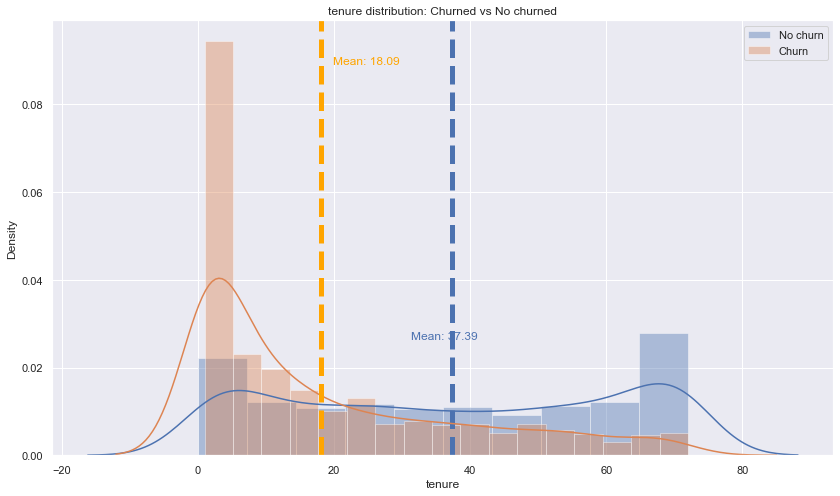

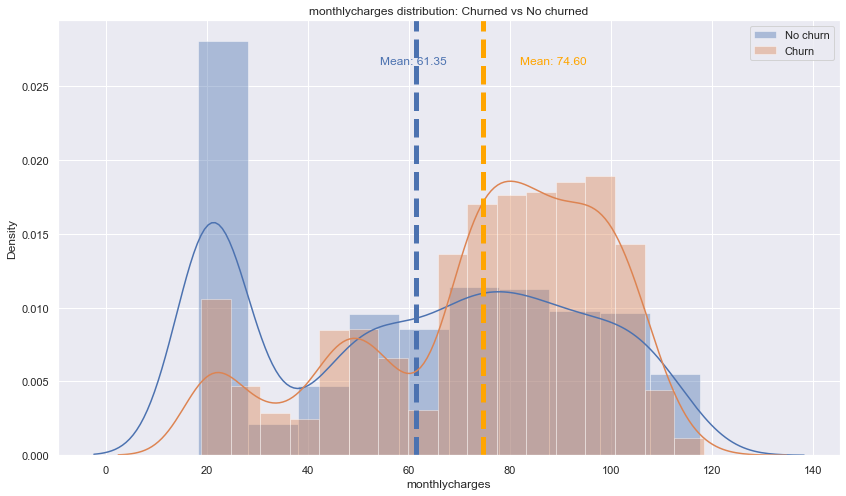

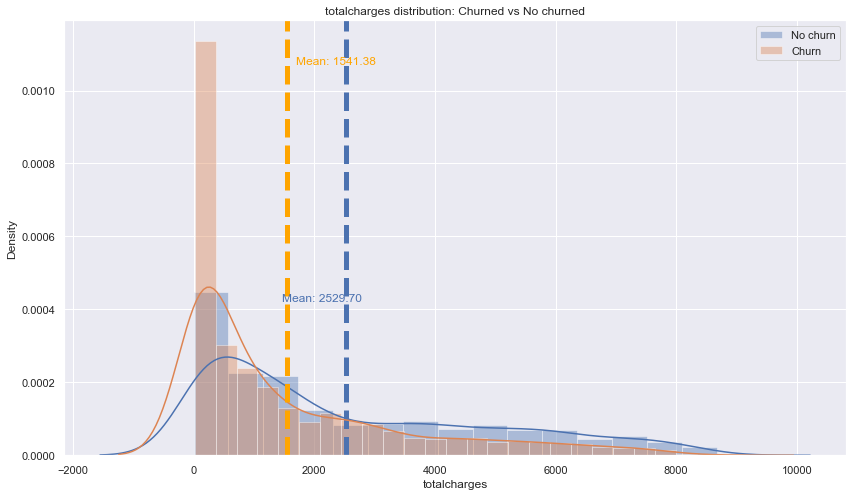

In [23]:
def plot_distribution(feature):
    plt.figure(figsize=(14,8))
    ax = sns.distplot(noChurned_customerSample[feature], label='No churn')
    plt.axvline(np.mean(noChurned_customerSample[feature]), color="b", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        noChurned_customerSample[feature].mean() + noChurned_customerSample[feature].mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(noChurned_customerSample[feature].mean()),
        ha= 'right', color="b"
    )
    
    ax = sns.distplot(Churned_customerSample[feature], label='Churn')
    plt.axvline(np.mean(Churned_customerSample[feature]), color="orange", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        Churned_customerSample[feature].mean() + Churned_customerSample[feature].mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(Churned_customerSample[feature].mean()),
        color="orange"
    )
    plt.title('{} distribution: Churned vs No churned'.format(feature))
    ax.legend()
    return plt.figure

for feature in numeric_features:
    plot_distribution(feature)

**Student t-test**

In [24]:
from scipy.stats import ttest_ind

def t_test(column):
    alpha = 0.05
    stat, p = ttest_ind(noChurned_customerSample[column].dropna(), Churned_customerSample[column].dropna())
    if p < alpha:
        return ('%.3f H0 rejected' % p)
    else:
        return 'H0 not rejected'

In [25]:
for feature in numeric_features:
    print(f'{feature :-<20} {t_test(feature)}')

tenure-------------- 0.000 H0 rejected
monthlycharges------ 0.000 H0 rejected
totalcharges-------- 0.000 H0 rejected


**Result interpretation:**
* So it's evident that `tenure`, `monthlycharges` and `totalcharges` have significant diffrences between churned and no churned customers. (Both means are evidently different from each other)

### Categorical data analysis

Now let's examine the categorical features in our dataset.

In [26]:
# list of numerical columns
cat_features = df.select_dtypes(include=['object']).columns.to_list()
cat_features.remove('churn')
cat_features

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [27]:
def cat_plot(feature):
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(17,7))
    
    plt.subplot(121)  
    axe=sns.countplot(x=feature, data=df)
    axe.set_xlabel(feature, fontsize = 18)
    axe.set_xticklabels(axe.get_xticklabels(), rotation=45, fontsize=14)
    axe.set_ylabel('count of {}'.format(feature), fontsize = 18)
    ax=plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height+2, '{:.2f}%'.format(100*(height/df[df.churn=='Yes'].shape[0])),
                fontsize=12,ha='center',va='bottom')
    sns.set(font_scale=1.5)
    plt.title('Customers by {}'.format(feature), fontweight="bold")
    
    plt.subplot(122)
    axe=sns.countplot(x=feature, data=df, hue='churn', color='r')
    axe.set_xlabel(feature, fontsize = 18)
    axe.set_xticklabels(axe.get_xticklabels(), rotation=45, fontsize=14)
    axe.set_ylabel('count of {}'.format(feature), fontsize = 18)
    #sns.set(font_scale=1.5)
    plt.title('Customers by {} Churn vs No churn'.format(feature), fontweight="bold")
    ;

Let’s check how categorical variables are related to customer churn.

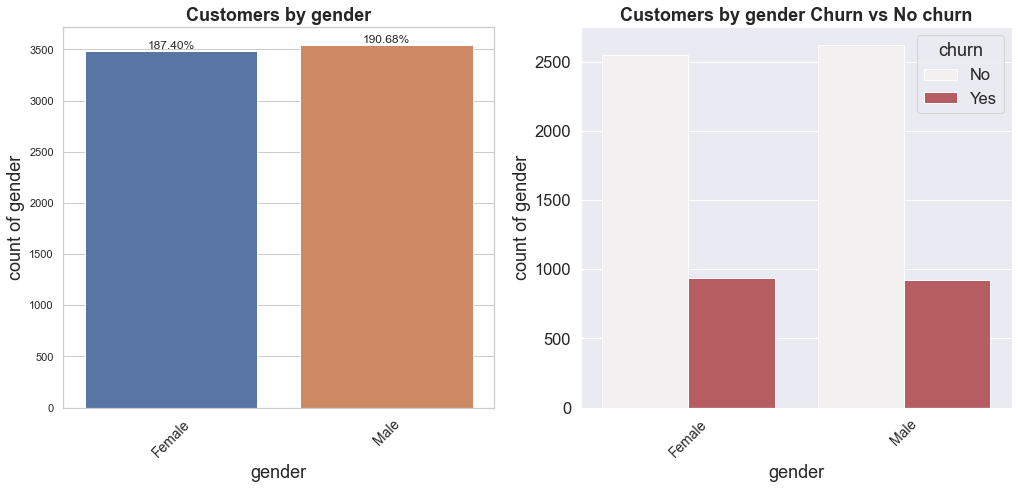

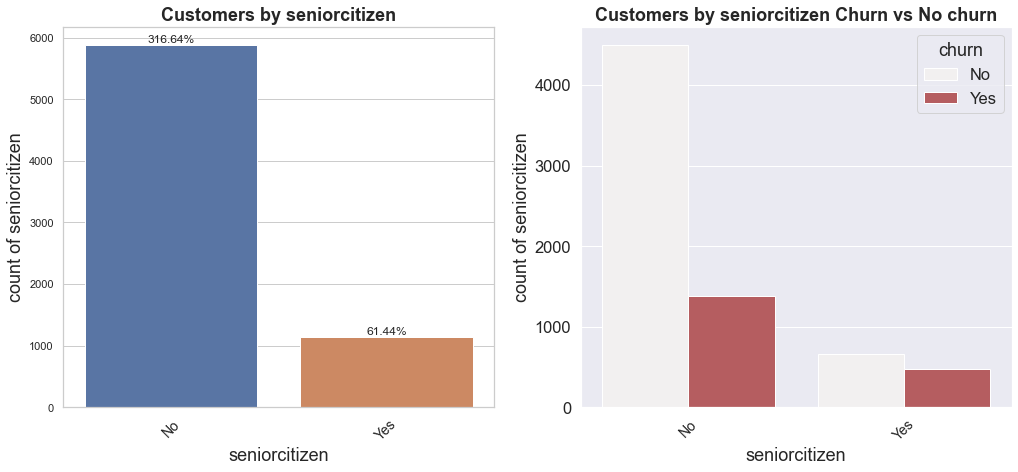

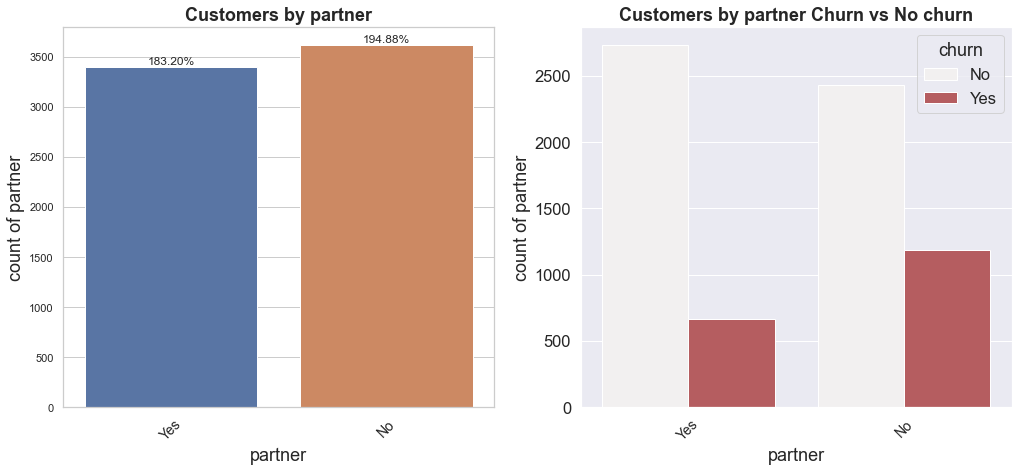

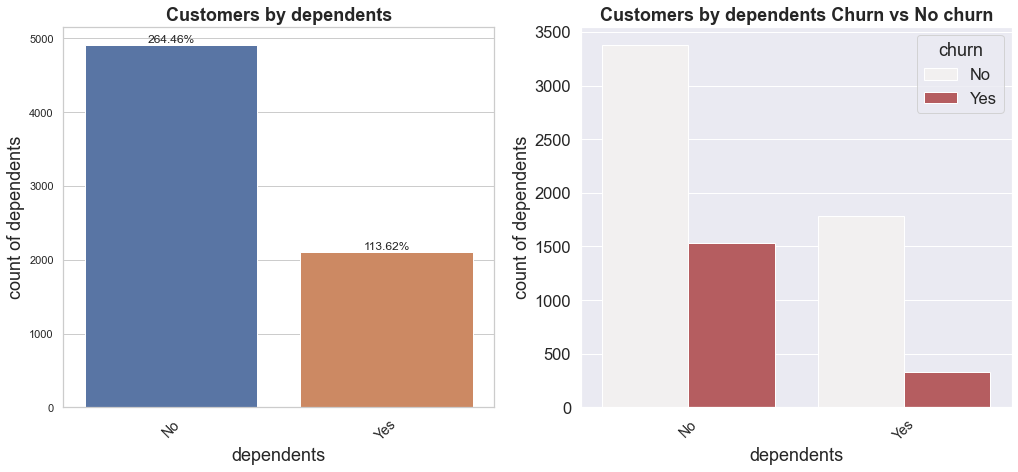

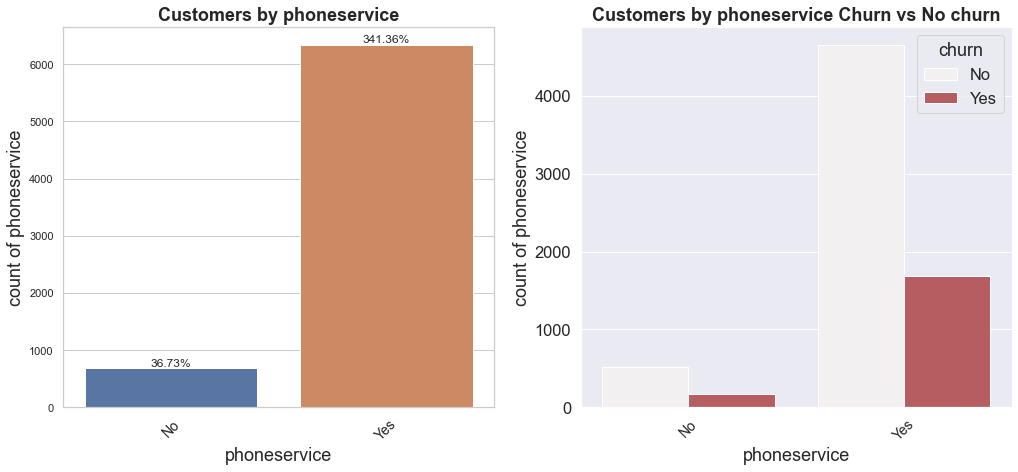

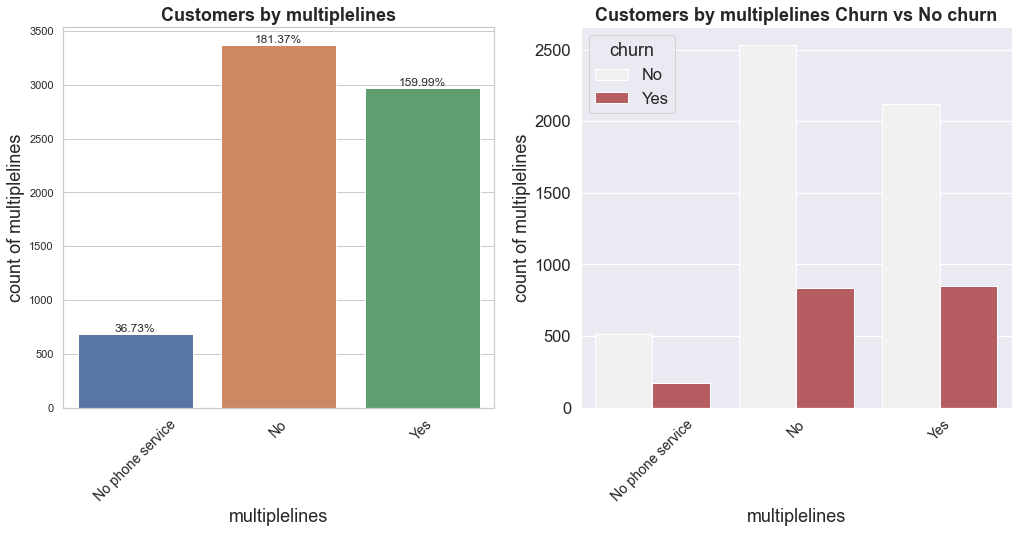

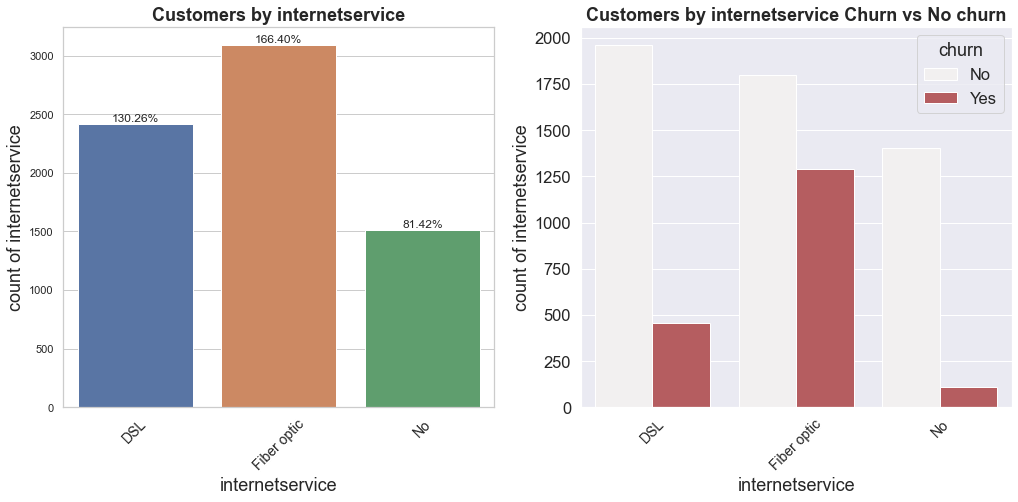

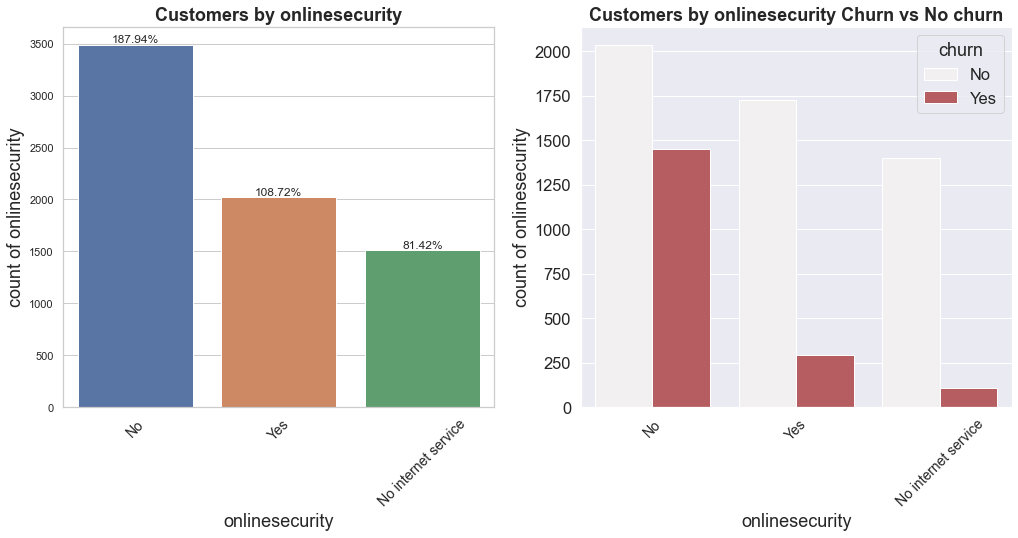

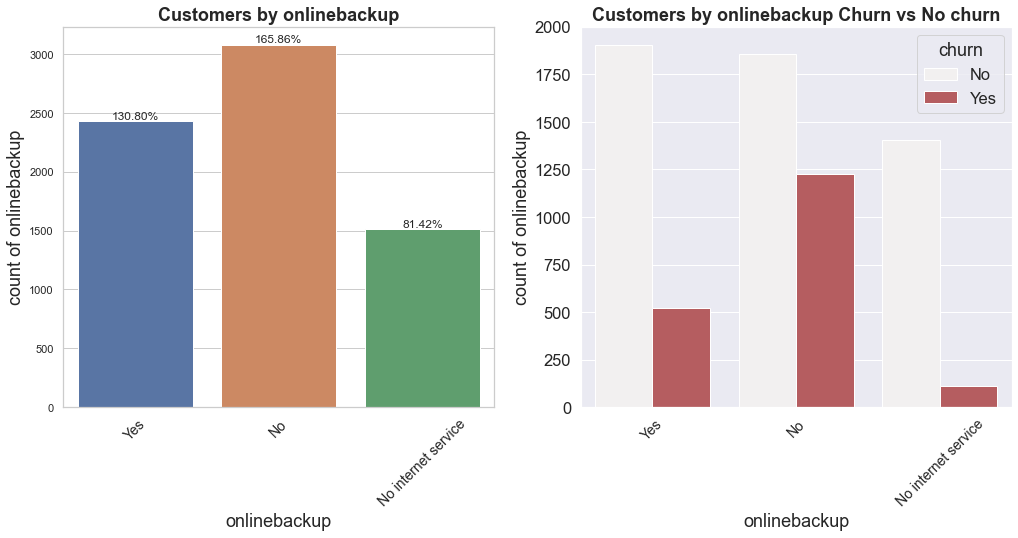

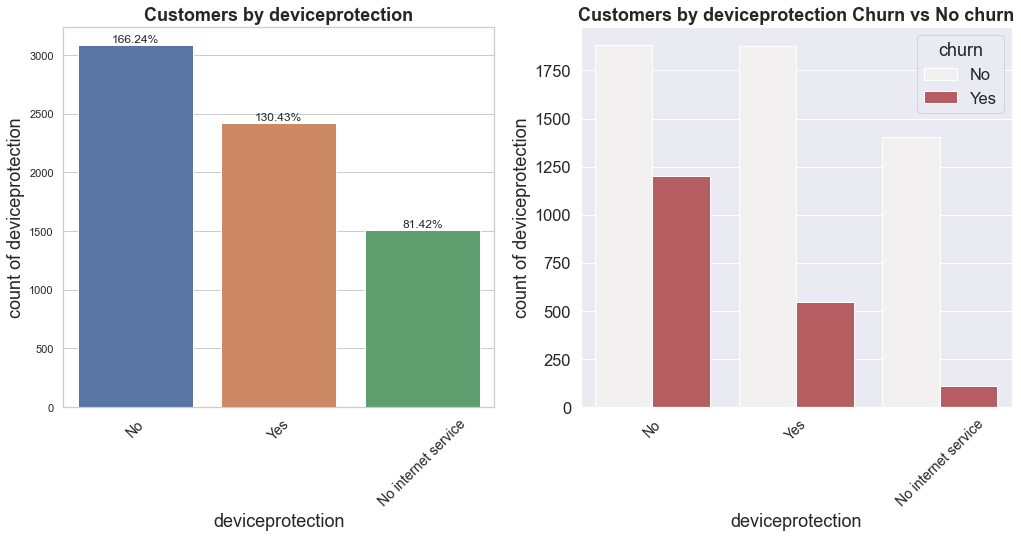

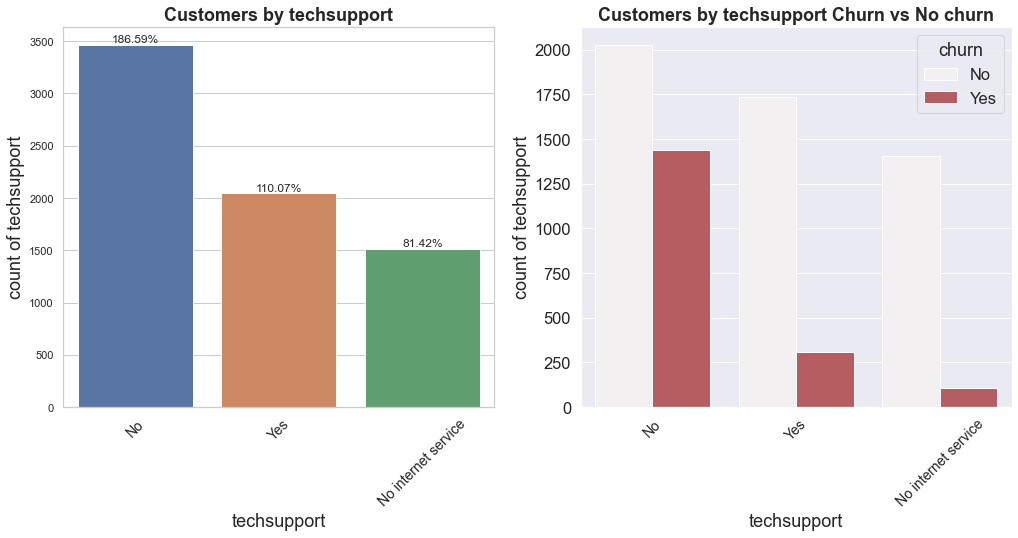

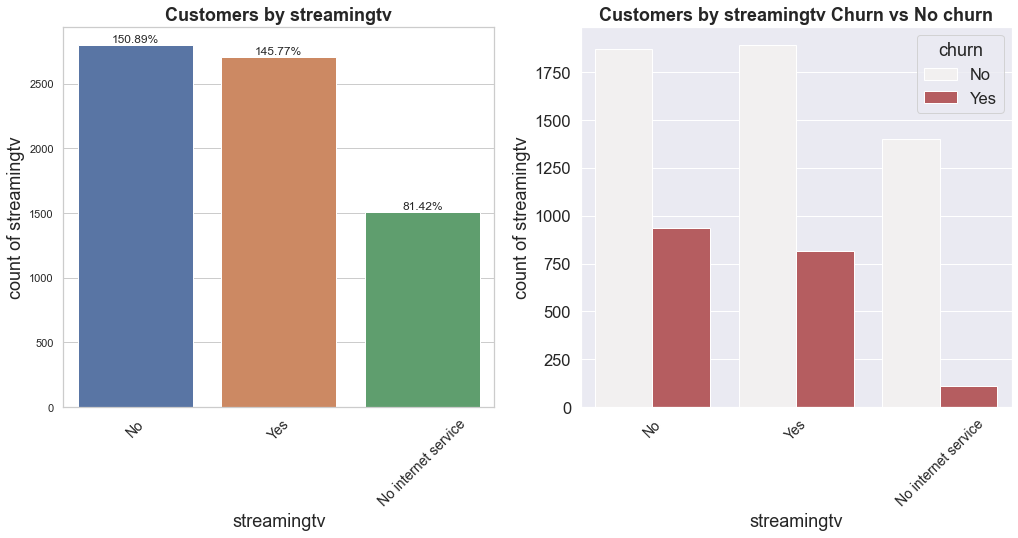

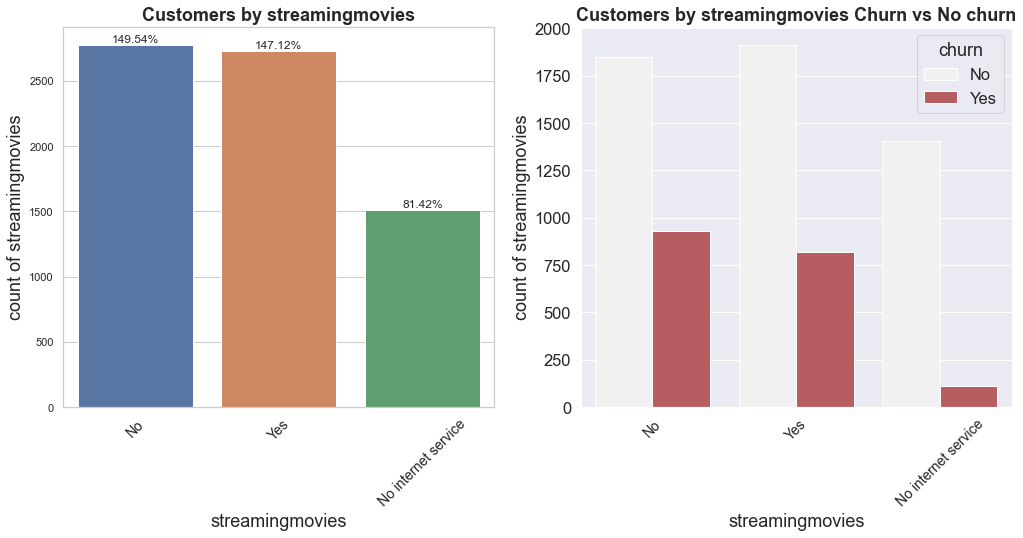

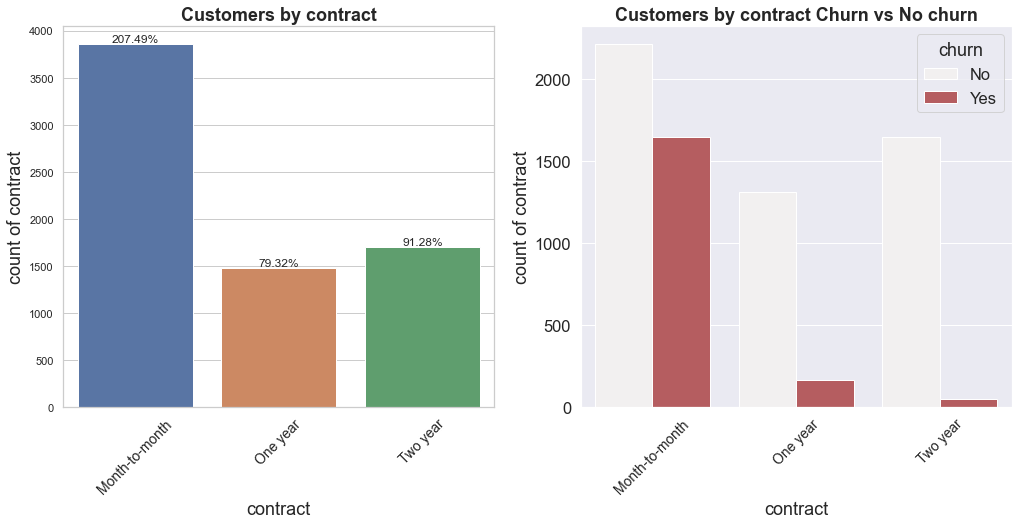

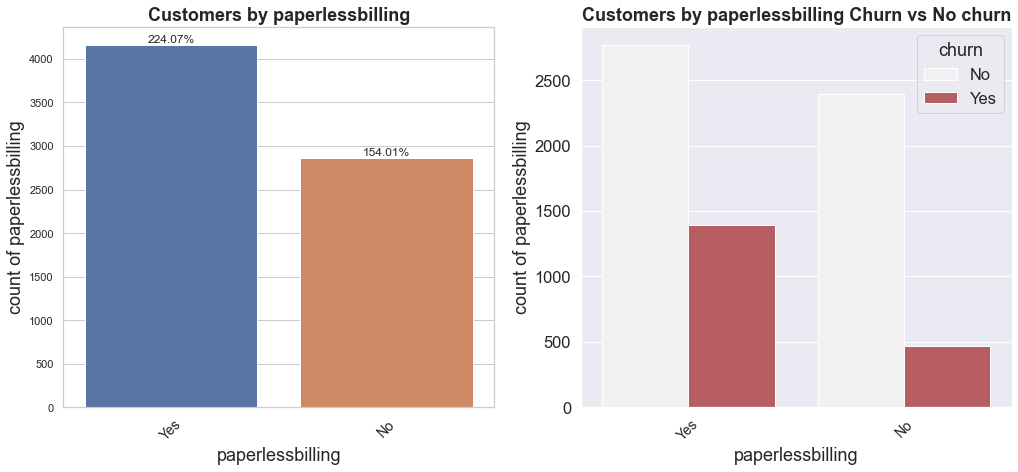

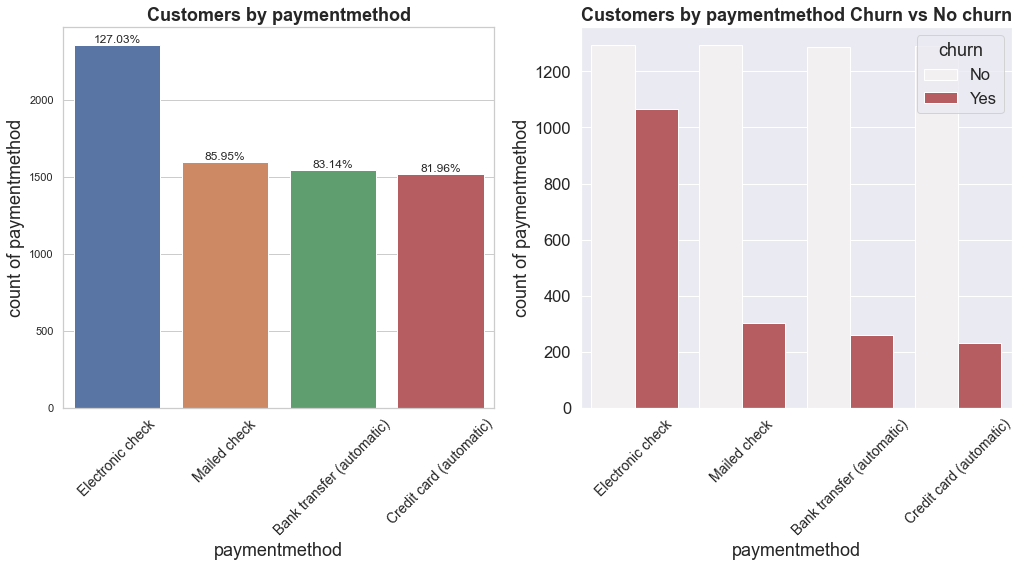

In [28]:
# review the relation between the target 'churn' and the categorival features
for feature in cat_features:
    cat_plot(feature)

We note the following:

* Our dataset has significantly less senior citizen than non-senior citizen
* Non-senior citizen end up to churn more than senior citizen


* Proportion of customers with no partners is slightly greater than customers who have partners
* Customers with no partners seems to churn more than who do have partners


* In our dataset the rate of customers without dependents is higher than those with dependents
* The greater proportion of churned customers is of those with no dependents


* Looking at services graphs we deduct: 
   - Significantly more customers with only phone service will not churn than those other customers.
   - Customers with multiple lines churn at approximately the same rate as those with a singular line.
   - Fiber Optic is the most internet option used by customers.
   - Significantly customers who used Fiber Optic Internet churn more than DSL or No Internet customers.
   - Customers with TV streaming and/or Movie Streaming services churn more than all other add-on services.
   

* Most customers use month to month contract option.
* The customers with month to month contract have the greater churn rate.
* The longer the plan is, the lower the churn rate is being.


* Customers with non-paperless billing churn more than paperless customers.

* Significantly customers who pay with Electronic check churn more than customers with all other payment methods.

### Multicollinearity

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the `corr` function from the pandas dataframe library. We will use the `heatmap` function from the seaborn library to plot the correlation matrix.

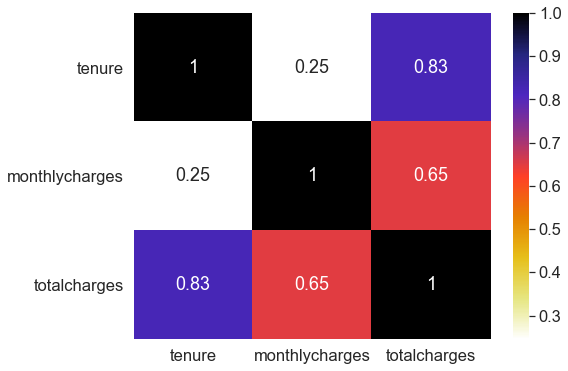

In [29]:
cor = df[numeric_features].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**Observations :**
* From the correlation matrix we find that `tenure` and `totalcharges` are highly correlated with 0.83 and this seems to be logical since the more the customer stay with the company the more totalcharges he will get so we can simlpy remove one of them to avoid multicollinearity.

## Encoding-TrainTest

In [30]:
# dummy the categorical features
target = df['churn'].replace({"Yes":1,"No":0})
data = df.drop('churn', axis=1)
data = pd.get_dummies(data, drop_first=True)  
dataframe = pd.concat([data,target], axis=1)

In [31]:
from sklearn.model_selection import train_test_split

# train test split
trainset, testset = train_test_split(dataframe, test_size=0.2, random_state=0)
print('trainset: ',trainset.shape)
print('testset: ', testset.shape)

trainset:  (5616, 31)
testset:  (1405, 31)


## Model building Phase

In this section, we are going to explore different machine learning classifier and train them using all the features, then we will try to tune hyperparameters and explore feature selection in order to get better performance for each model.


And at the end, we will select among them the one that perform well and have the better accuracy.

The algorithms we will consider are as follows:

1. Decision Tree
2. K-Nearest Neighbors (KNN)
3. Stochastic Gradient Descent Classifier (SGD)
4. Support Vector Machine (SVM)
5. Logistic Regression
6. AdaBoost 
5. Gradient Boosting
6. Bagging Classifier
7. Random Forest

In [32]:
# scoring functions
from sklearn.metrics import f1_score, confusion_matrix, classification_report, plot_confusion_matrix

In [33]:
# get inputs and output to fit in our models
X_train = trainset.iloc[:,:-1]
y_train = trainset.iloc[:,-1]
X_test = testset.iloc[:,:-1]
y_test = testset.iloc[:,-1]

As our data is imbalanced we will not consider the accuracy metric to evaluate our models instead we will use `Precision`, `Recall` and `F-beta score` to measure the performance of our models.

In [34]:
# here we create a function that helps to evaluate each of the models we will create
def model_evaluation(model):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    
    cf_matrix = confusion_matrix(y_test,y_predicted)
    #cf_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
    axes = sns.heatmap(cf_matrix, square=True, annot=True, fmt='d', cmap=plt.cm.RdPu)
    axes.set_xlabel('Actual', size=15)
    axes.set_ylabel('Predicted', size=15)
    class_labels = ['not churn','churn']
    tick_marks = np.arange(len(class_labels)) + 0.5
    axes.set_xticks(tick_marks)
    axes.set_xticklabels(class_labels, size=12)
    axes.set_yticks(tick_marks)
    axes.set_yticklabels(class_labels, size=12)
    axes.set_title('Confusion Matrix for {}'.format(model.__class__.__name__), size=15)
    plt.show()
    print(classification_report(y_test,y_predicted))

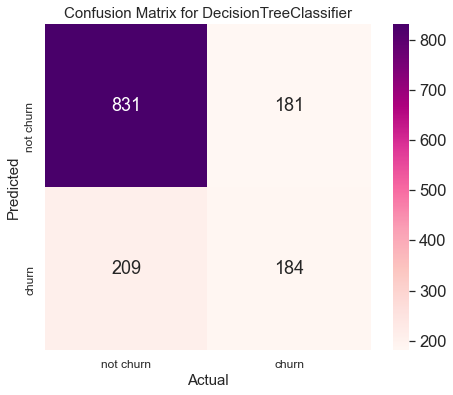

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1012
           1       0.50      0.47      0.49       393

    accuracy                           0.72      1405
   macro avg       0.65      0.64      0.65      1405
weighted avg       0.72      0.72      0.72      1405



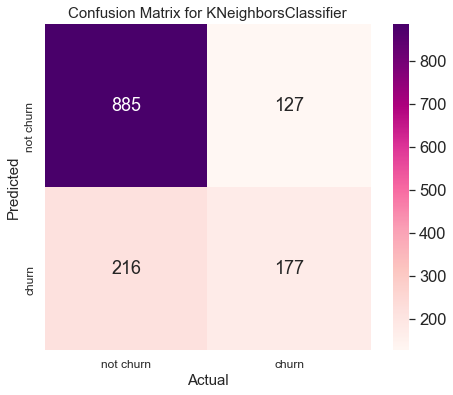

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1012
           1       0.58      0.45      0.51       393

    accuracy                           0.76      1405
   macro avg       0.69      0.66      0.67      1405
weighted avg       0.74      0.76      0.75      1405



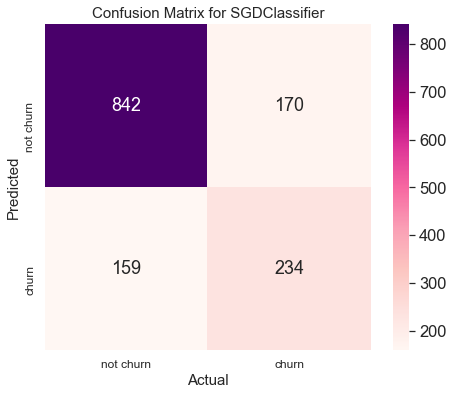

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1012
           1       0.58      0.60      0.59       393

    accuracy                           0.77      1405
   macro avg       0.71      0.71      0.71      1405
weighted avg       0.77      0.77      0.77      1405



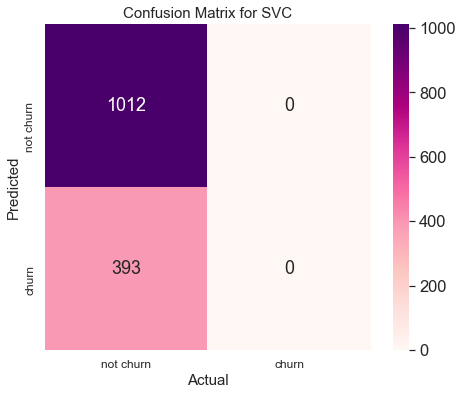

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1012
           1       0.00      0.00      0.00       393

    accuracy                           0.72      1405
   macro avg       0.36      0.50      0.42      1405
weighted avg       0.52      0.72      0.60      1405



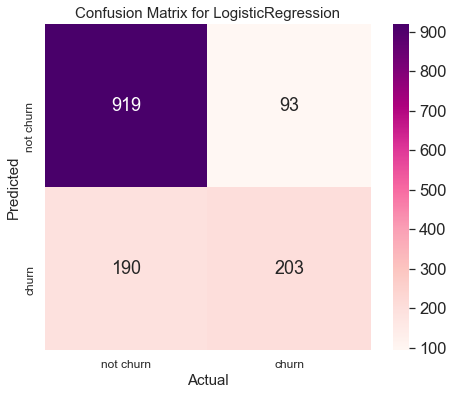

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1012
           1       0.69      0.52      0.59       393

    accuracy                           0.80      1405
   macro avg       0.76      0.71      0.73      1405
weighted avg       0.79      0.80      0.79      1405



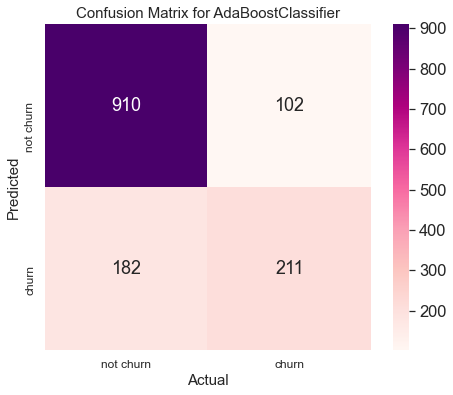

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1012
           1       0.67      0.54      0.60       393

    accuracy                           0.80      1405
   macro avg       0.75      0.72      0.73      1405
weighted avg       0.79      0.80      0.79      1405



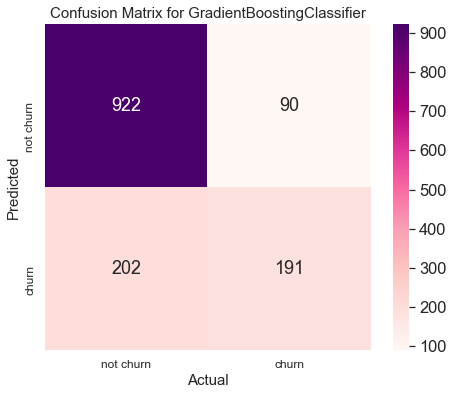

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1012
           1       0.68      0.49      0.57       393

    accuracy                           0.79      1405
   macro avg       0.75      0.70      0.72      1405
weighted avg       0.78      0.79      0.78      1405



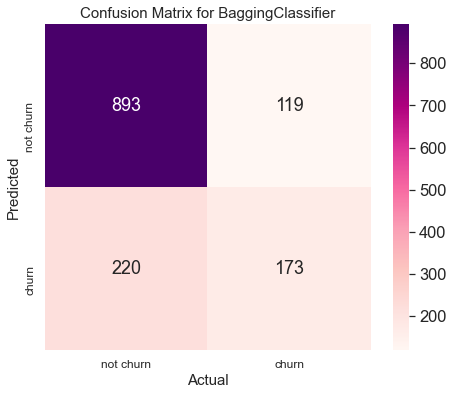

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1012
           1       0.59      0.44      0.51       393

    accuracy                           0.76      1405
   macro avg       0.70      0.66      0.67      1405
weighted avg       0.74      0.76      0.75      1405



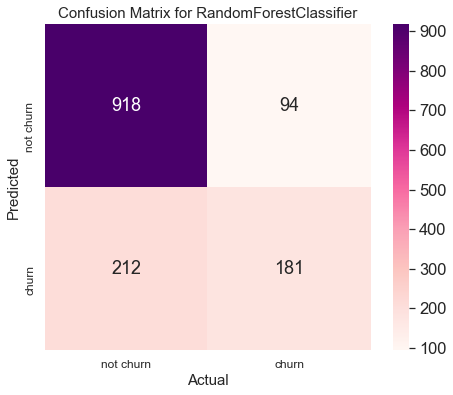

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1012
           1       0.66      0.46      0.54       393

    accuracy                           0.78      1405
   macro avg       0.74      0.68      0.70      1405
weighted avg       0.77      0.78      0.77      1405



In [35]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DecisonTree_clf = DecisionTreeClassifier(random_state=0)
model_evaluation(DecisonTree_clf)

# K Nearest Neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier()
model_evaluation(KNN_clf)

# SGD Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#SGD_clf = make_pipeline(StandardScaler(), SGDClassifier())
SGD_clf = SGDClassifier()
model_evaluation(SGD_clf)

# Support Vector Machine (SVM)
from sklearn.svm import SVC
SVM_clf = SVC(random_state=0)
model_evaluation(SVM_clf)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
LogReg_clf = LogisticRegression(random_state=0)
model_evaluation(LogReg_clf)

# AdaBoost 
from sklearn.ensemble import AdaBoostClassifier
AdaBoost_clf = AdaBoostClassifier(n_estimators=150, random_state=0)
model_evaluation(AdaBoost_clf)

# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(random_state=0)
model_evaluation(GB_clf)

# Bagging Classifier: Bagging technique is very useful when our model is overfitting the data.
from sklearn.ensemble import BaggingClassifier
Bagging_clf = BaggingClassifier(base_estimator=KNeighborsClassifier() ,n_estimators=200)
model_evaluation(Bagging_clf)

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=200)
model_evaluation(RF_clf)

It seems that the best models so far are the Logistic Regression, AdaBoost, Gradient Boosting and the Random Forest. So let's try to optimize our models by parameters tuning.

### Model optimization

In this step we are going to improve the performance of our models by focusing on some techniques such as: 
- Feature selection
- Cross validation
- Hyperparameters tuning.

In [36]:
# function to report best estimator

from sklearn.model_selection import RandomizedSearchCV

def model_with_hyperparams_tuning_evaluation(model, params_dict, X_train, y_train, X_test, y_test):
    
    model_random = RandomizedSearchCV(model, params_dict, n_iter=50, cv=5, random_state=0)
    model_random.fit(X_train, y_train)
    y_predicted = model_random.best_estimator_.predict(X_test)
    
    cf_matrix = confusion_matrix(y_test,y_predicted)
    axes = sns.heatmap(cf_matrix, square=True, annot=True, fmt='d', cmap=plt.cm.RdPu)
    axes.set_xlabel('Actual', size=15)
    axes.set_ylabel('Predicted', size=15)
    class_labels = ['not churn','churn']
    tick_marks = np.arange(len(class_labels)) + 0.5
    axes.set_xticks(tick_marks)
    axes.set_xticklabels(class_labels, size=12)
    axes.set_yticks(tick_marks)
    axes.set_yticklabels(class_labels, size=12)
    axes.set_title('Confusion Matrix for {}'.format(model.__class__.__name__), size=15)
    plt.show()
    
    print(classification_report(y_test,y_predicted))
    
    print('best parameters for {} are : \n {}'.format(model.__class__.__name__,model_random.best_params_))
    print('\n')

For each model we will try multiple combinations of parameters and then select those who make our model doing well using the `RandomizedSearchCV()` function.

In [37]:
def models_with_hyperparams_tuning_train(X_train, y_train, X_test, y_test):
    
    # Decision Tree Classifier

    # dictionary of parameters
    DTree_params_dic = {
        "criterion": ['gini', 'entropy'],
        "max_depth": [7, 15],
        "min_samples_split": [5, 10],
        "random_state": [0, 20, 50, 100]
    }
    DecisonTree_clf = DecisionTreeClassifier()
    model_with_hyperparams_tuning_evaluation(DecisonTree_clf, DTree_params_dic, X_train, y_train, X_test, y_test)


    # K Nearest Neighbor (KNN)

    # dictionary of parameters
    KNN_params_dic = {'n_neighbors' : [5,10,15],
                      'weights' : ['uniform', 'distance'],
                      'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                      'leaf_size' : [5,10,20,30]
                     }
    KNN_clf = KNeighborsClassifier()
    model_with_hyperparams_tuning_evaluation(KNN_clf, KNN_params_dic, X_train, y_train, X_test, y_test)


    # SGD Classifier

    # dictionary of parameters
    SGD_params_dic = {'max_iter': [100, 500, 1000, 1500, 2000],
                      'random_state': [0, 20, 50, 100],
                      'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
                     }
    SGD_clf = SGDClassifier()
    model_with_hyperparams_tuning_evaluation(SGD_clf, SGD_params_dic, X_train, y_train, X_test, y_test)


    # Support Vector Machine (SVM)

    # dictionary of parameters
    SVM_params_dic = {'C': [0.1, 1, 10, 100, 1000],  
                     'gamma': ['scale', 'auto']
                     }  
    SVM_clf = SVC()
    model_with_hyperparams_tuning_evaluation(SVM_clf, SVM_params_dic, X_train, y_train, X_test, y_test)


    # Logistic Regression

    # dictionary of parameters
    LogReg_params_dic = {'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                         'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [100, 500, 1000, 1500, 2000],
                         'random_state': [0, 20, 50, 100]
                        }
    LogReg_clf = LogisticRegression()
    model_with_hyperparams_tuning_evaluation(LogReg_clf, LogReg_params_dic, X_train, y_train, X_test, y_test)


    # AdaBoost 
    
    # dictionary of parameters
    AdaBoost_params_dic = {'n_estimators': [50, 100, 500,1000,1500, 2000],
                           'learning_rate': [.001,0.01,.1],
                           'random_state': [0, 20, 50, 100]
                          }
    AdaBoost_clf = AdaBoostClassifier()
    model_with_hyperparams_tuning_evaluation(AdaBoost_clf, AdaBoost_params_dic, X_train, y_train, X_test, y_test)


    # GradientBoosting

    # dictionary of parameters
    GB_params_dic = {'learning_rate': [.001,0.01,.1,1,10,100],
                     'n_estimators' :[5,50,250,500],
                     'max_depth' :[1,3,5,7,9],
                     'random_state': [0, 20, 50, 100, 150]
                    }
    GB_clf = GradientBoostingClassifier()
    model_with_hyperparams_tuning_evaluation(GB_clf, GB_params_dic, X_train, y_train, X_test, y_test)


    # Bagging Classifier

    # dictionary of parameters
    Bagging_params_dic = {'n_estimators': [10, 100, 500, 1000, 1500],
                          'base_estimator': [KNeighborsClassifier(), DecisionTreeClassifier()],
                          'random_state': [0, 20, 50, 100]
                         }
    Bagging_clf = BaggingClassifier()
    model_with_hyperparams_tuning_evaluation(Bagging_clf, Bagging_params_dic, X_train, y_train, X_test, y_test)


    # RandomForestClassifier

    # dictionary of parameters
    RFR_params_dic = {'n_estimators': [10, 100, 200, 300],
                      "criterion": ['gini', 'entropy'],
                      'max_depth': [10, 15, 20, 30],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 5],
                      'max_features': [50, 100, 150, X_train.shape[1]],
                      'random_state': [0, 2, 8, 20, 30, 60, 80, 100]
                      }
    RF_clf = RandomForestClassifier()
    model_with_hyperparams_tuning_evaluation(RF_clf, RFR_params_dic, X_train, y_train, X_test, y_test)

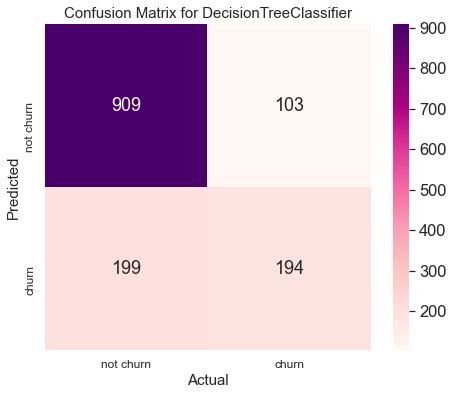

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1012
           1       0.65      0.49      0.56       393

    accuracy                           0.79      1405
   macro avg       0.74      0.70      0.71      1405
weighted avg       0.77      0.79      0.77      1405

best parameters for DecisionTreeClassifier are : 
 {'random_state': 0, 'min_samples_split': 5, 'max_depth': 7, 'criterion': 'entropy'}




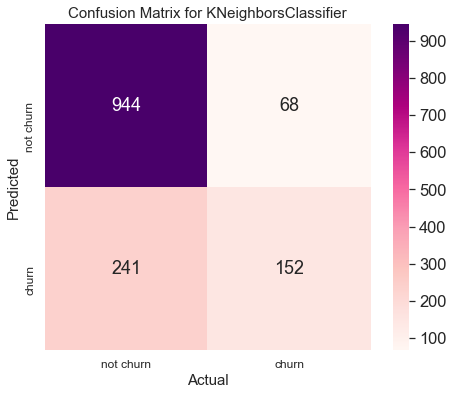

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1012
           1       0.69      0.39      0.50       393

    accuracy                           0.78      1405
   macro avg       0.74      0.66      0.68      1405
weighted avg       0.77      0.78      0.76      1405

best parameters for KNeighborsClassifier are : 
 {'weights': 'uniform', 'n_neighbors': 10, 'leaf_size': 20, 'algorithm': 'ball_tree'}




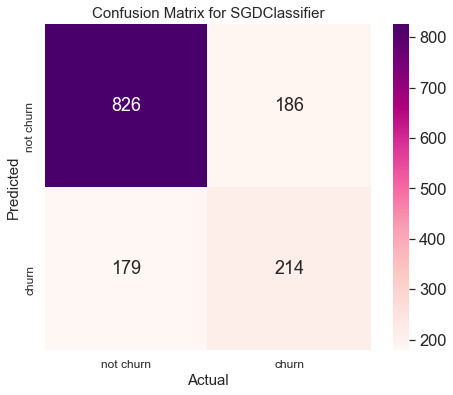

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1012
           1       0.54      0.54      0.54       393

    accuracy                           0.74      1405
   macro avg       0.68      0.68      0.68      1405
weighted avg       0.74      0.74      0.74      1405

best parameters for SGDClassifier are : 
 {'random_state': 20, 'max_iter': 1000, 'alpha': 10}




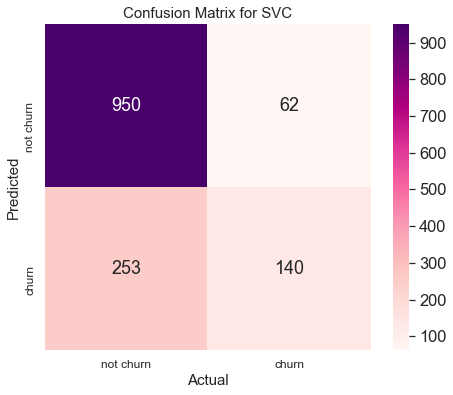

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1012
           1       0.69      0.36      0.47       393

    accuracy                           0.78      1405
   macro avg       0.74      0.65      0.66      1405
weighted avg       0.76      0.78      0.75      1405

best parameters for SVC are : 
 {'gamma': 'scale', 'C': 1000}




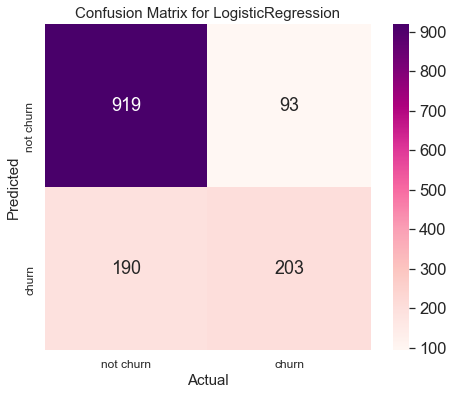

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1012
           1       0.69      0.52      0.59       393

    accuracy                           0.80      1405
   macro avg       0.76      0.71      0.73      1405
weighted avg       0.79      0.80      0.79      1405

best parameters for LogisticRegression are : 
 {'solver': 'lbfgs', 'random_state': 50, 'penalty': 'l2', 'max_iter': 1500, 'C': 1.0}




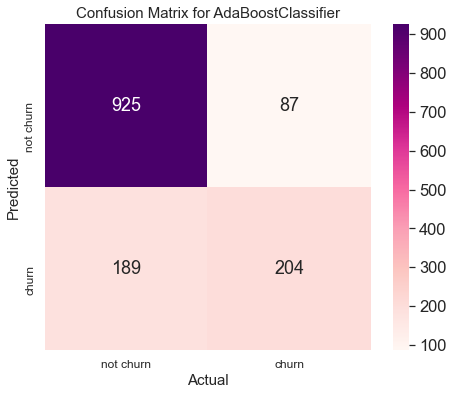

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1012
           1       0.70      0.52      0.60       393

    accuracy                           0.80      1405
   macro avg       0.77      0.72      0.73      1405
weighted avg       0.79      0.80      0.79      1405

best parameters for AdaBoostClassifier are : 
 {'random_state': 100, 'n_estimators': 500, 'learning_rate': 0.1}




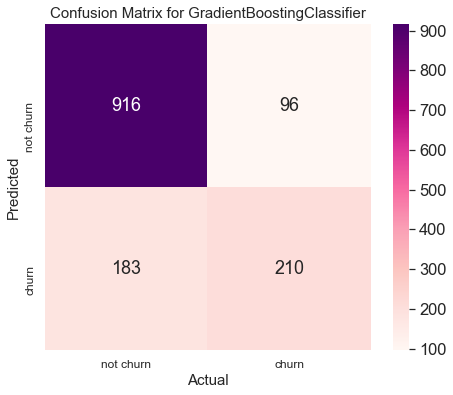

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1012
           1       0.69      0.53      0.60       393

    accuracy                           0.80      1405
   macro avg       0.76      0.72      0.73      1405
weighted avg       0.79      0.80      0.79      1405

best parameters for GradientBoostingClassifier are : 
 {'random_state': 50, 'n_estimators': 250, 'max_depth': 1, 'learning_rate': 1}




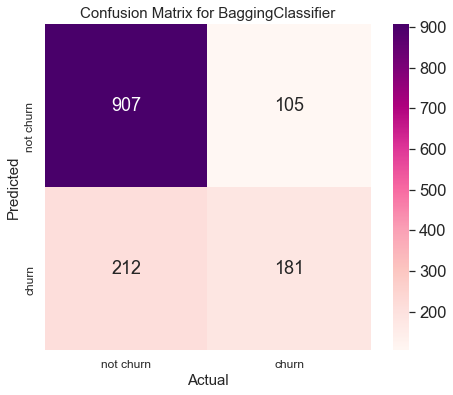

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1012
           1       0.63      0.46      0.53       393

    accuracy                           0.77      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.76      0.77      0.76      1405

best parameters for BaggingClassifier are : 
 {'random_state': 20, 'n_estimators': 1500, 'base_estimator': DecisionTreeClassifier()}




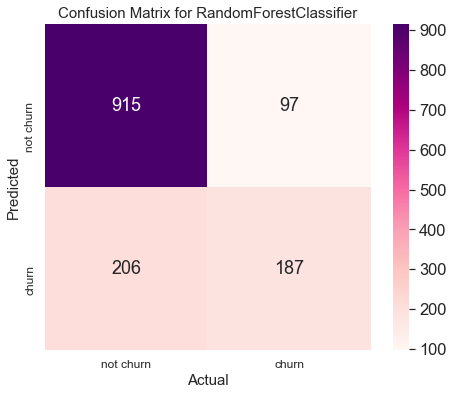

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1012
           1       0.66      0.48      0.55       393

    accuracy                           0.78      1405
   macro avg       0.74      0.69      0.71      1405
weighted avg       0.77      0.78      0.77      1405

best parameters for RandomForestClassifier are : 
 {'random_state': 20, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 30, 'max_depth': 10, 'criterion': 'gini'}




In [38]:
# train each models
models_with_hyperparams_tuning_train(X_train,y_train,X_test,y_test)

**Feature selection**

Here we're about to use one of the methods of feature selection which is the `Chi-square test` in order to choose the features with the stronger relation with the target.

**Chi-square Test**

We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. 

In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

In [39]:
# categorical variables
X = trainset.iloc[:,3:-1]

# target variable
y = trainset.iloc[:,-1]

So here we are going to check the significance of each feature against the target variable `churn`:

* Null hypothesis: There is no relationship between the categorical feature and the target variable.

* Alternative hypothesis: There is a relationship between the categorical feature and the target variable.

In [40]:
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile

features_names = trainset.iloc[:,3:-1].columns
chi2_stats, p_val = chi2(X,y)
chi2_test_df = pd.DataFrame(list(zip(features_names,chi2_stats,p_val)),
                  columns=['feature','chi2_score','p_val']).sort_values(by='p_val', ignore_index=True)
chi2_test_df

,feature,chi2_score,p_val
0,contract_Two year,376.006301,9.214341e-84
1,paymentmethod_Electronic check,334.189149,1.175986e-74
2,internetservice_Fiber optic,289.289502,7.101792e-65
3,deviceprotection_No internet service,223.748528,1.376464e-50
4,techsupport_No internet service,223.748528,1.376464e-50
5,streamingmovies_No internet service,223.748528,1.376464e-50
6,onlinebackup_No internet service,223.748528,1.376464e-50
7,onlinesecurity_No internet service,223.748528,1.376464e-50
8,internetservice_No,223.748528,1.376464e-50
9,streamingtv_No internet service,223.748528,1.376464e-50


In [41]:
# we are going to select the features with p_value less than 0.05
top_list = list(chi2_test_df.loc[chi2_test_df.p_val<0.05].feature) 

# we select only the columns of selected features 
selected_trainset = pd.concat([trainset.iloc[:,:3], trainset[top_list], trainset['churn']], axis=1)
selected_testset = pd.concat([testset.iloc[:,:3], testset[top_list], testset['churn']], axis=1)

# get inputs and output to fit in our models
selected_X_train = selected_trainset.iloc[:,:-1]
selected_y_train = selected_trainset.iloc[:,-1]
selected_X_test = selected_testset.iloc[:,:-1]
selected_y_test = selected_testset.iloc[:,-1]

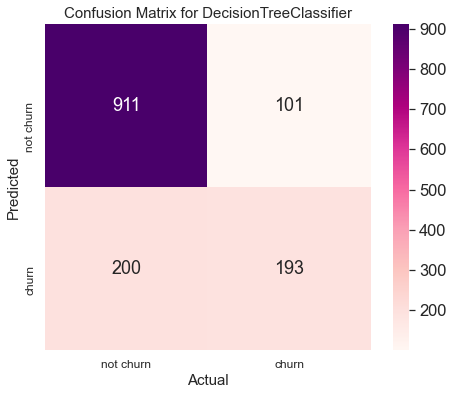

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1012
           1       0.66      0.49      0.56       393

    accuracy                           0.79      1405
   macro avg       0.74      0.70      0.71      1405
weighted avg       0.77      0.79      0.78      1405

best parameters for DecisionTreeClassifier are : 
 {'random_state': 20, 'min_samples_split': 5, 'max_depth': 7, 'criterion': 'entropy'}




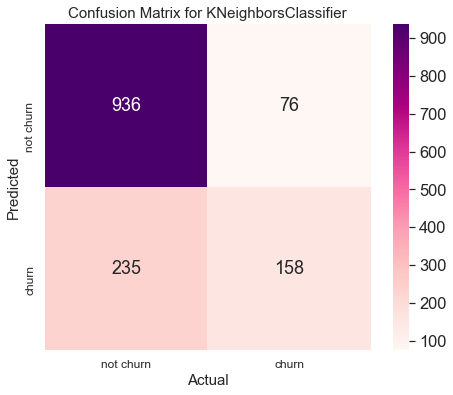

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1012
           1       0.68      0.40      0.50       393

    accuracy                           0.78      1405
   macro avg       0.74      0.66      0.68      1405
weighted avg       0.76      0.78      0.76      1405

best parameters for KNeighborsClassifier are : 
 {'weights': 'uniform', 'n_neighbors': 15, 'leaf_size': 20, 'algorithm': 'auto'}




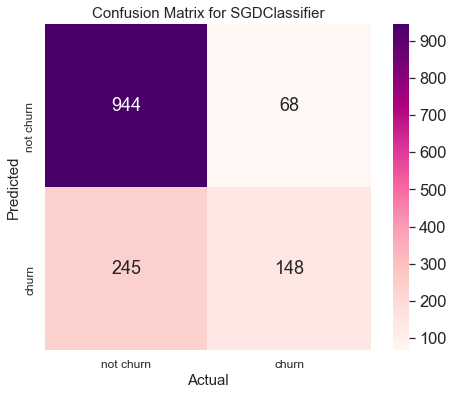

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1012
           1       0.69      0.38      0.49       393

    accuracy                           0.78      1405
   macro avg       0.74      0.65      0.67      1405
weighted avg       0.76      0.78      0.75      1405

best parameters for SGDClassifier are : 
 {'random_state': 0, 'max_iter': 500, 'alpha': 10}




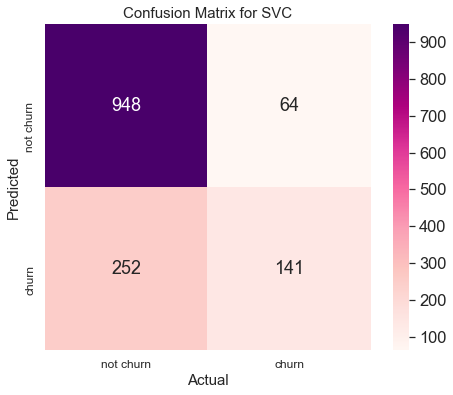

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1012
           1       0.69      0.36      0.47       393

    accuracy                           0.78      1405
   macro avg       0.74      0.65      0.66      1405
weighted avg       0.76      0.78      0.75      1405

best parameters for SVC are : 
 {'gamma': 'scale', 'C': 1000}




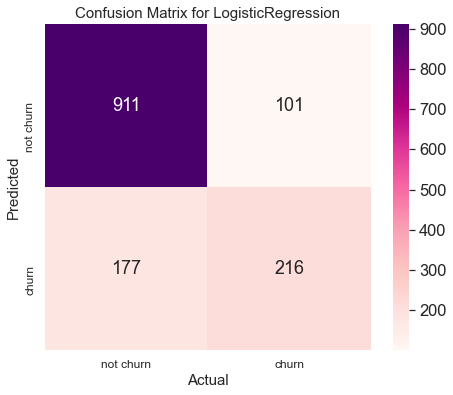

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1012
           1       0.68      0.55      0.61       393

    accuracy                           0.80      1405
   macro avg       0.76      0.72      0.74      1405
weighted avg       0.79      0.80      0.80      1405

best parameters for LogisticRegression are : 
 {'solver': 'lbfgs', 'random_state': 0, 'penalty': 'l2', 'max_iter': 2000, 'C': 100}




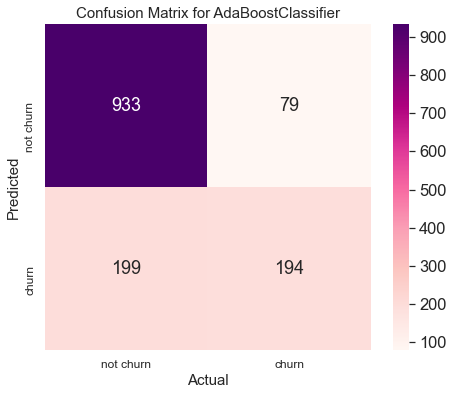

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1012
           1       0.71      0.49      0.58       393

    accuracy                           0.80      1405
   macro avg       0.77      0.71      0.73      1405
weighted avg       0.79      0.80      0.79      1405

best parameters for AdaBoostClassifier are : 
 {'random_state': 20, 'n_estimators': 2000, 'learning_rate': 0.01}




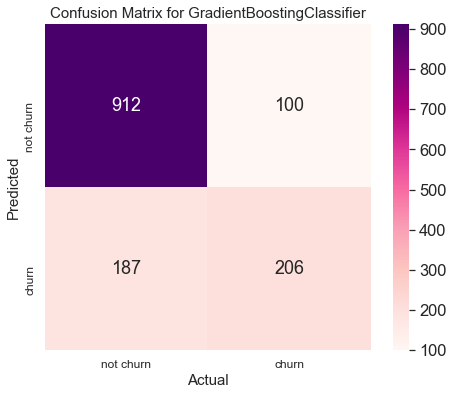

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1012
           1       0.67      0.52      0.59       393

    accuracy                           0.80      1405
   macro avg       0.75      0.71      0.73      1405
weighted avg       0.79      0.80      0.79      1405

best parameters for GradientBoostingClassifier are : 
 {'random_state': 50, 'n_estimators': 250, 'max_depth': 1, 'learning_rate': 1}




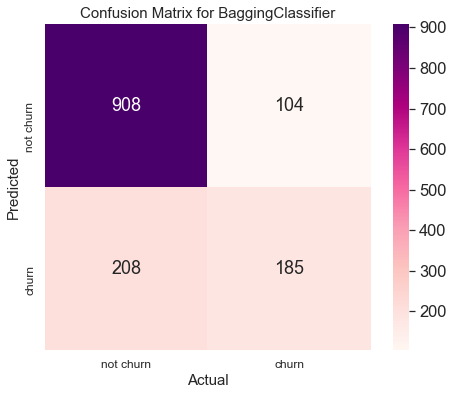

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1012
           1       0.64      0.47      0.54       393

    accuracy                           0.78      1405
   macro avg       0.73      0.68      0.70      1405
weighted avg       0.77      0.78      0.77      1405

best parameters for BaggingClassifier are : 
 {'random_state': 20, 'n_estimators': 500, 'base_estimator': DecisionTreeClassifier()}




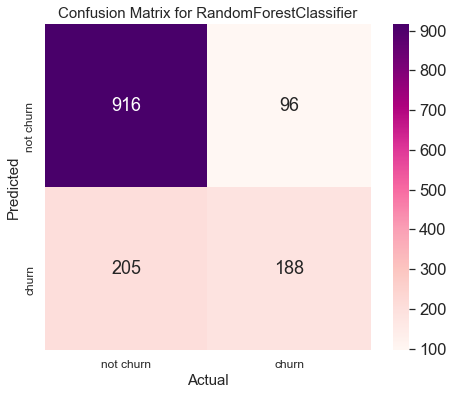

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1012
           1       0.66      0.48      0.56       393

    accuracy                           0.79      1405
   macro avg       0.74      0.69      0.71      1405
weighted avg       0.77      0.79      0.77      1405

best parameters for RandomForestClassifier are : 
 {'random_state': 20, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 27, 'max_depth': 10, 'criterion': 'gini'}




In [42]:
# retrain model after feature selecting
models_with_hyperparams_tuning_train(selected_X_train,selected_y_train,selected_X_test,selected_y_test)

**Feature preprocessing**

The above base models were performed on the original data without any normalization. Here, we adopt the MinMaxScaler and constrain the range of values to be between 0 and 1.

In [43]:
# normalizing continous variables
cols_to_scale = ['tenure','monthlycharges','totalcharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
selected_trainset[cols_to_scale] = scaler.fit_transform(selected_trainset[cols_to_scale])
selected_testset[cols_to_scale] = scaler.transform(selected_testset[cols_to_scale])

In [44]:
# get inputs and output to fit in our models
selected_X_train = selected_trainset.iloc[:,:-1]
selected_y_train = selected_trainset.iloc[:,-1]
selected_X_test = selected_testset.iloc[:,:-1]
selected_y_test = selected_testset.iloc[:,-1]

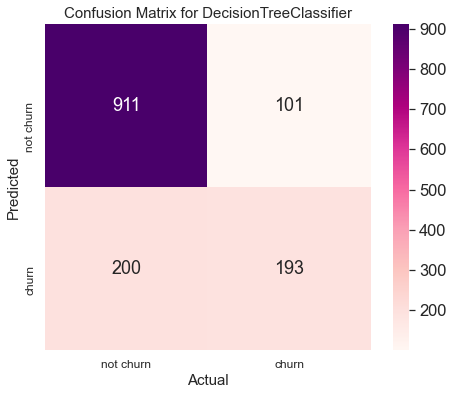

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1012
           1       0.66      0.49      0.56       393

    accuracy                           0.79      1405
   macro avg       0.74      0.70      0.71      1405
weighted avg       0.77      0.79      0.78      1405

best parameters for DecisionTreeClassifier are : 
 {'random_state': 20, 'min_samples_split': 5, 'max_depth': 7, 'criterion': 'entropy'}




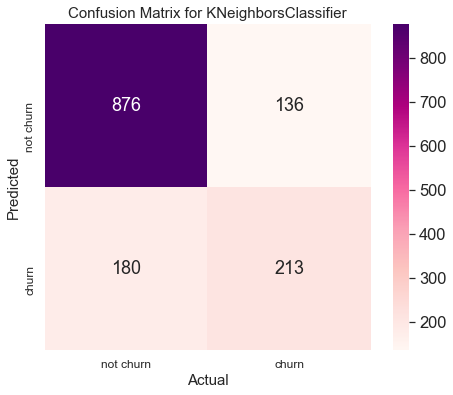

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1012
           1       0.61      0.54      0.57       393

    accuracy                           0.78      1405
   macro avg       0.72      0.70      0.71      1405
weighted avg       0.77      0.78      0.77      1405

best parameters for KNeighborsClassifier are : 
 {'weights': 'uniform', 'n_neighbors': 15, 'leaf_size': 20, 'algorithm': 'auto'}




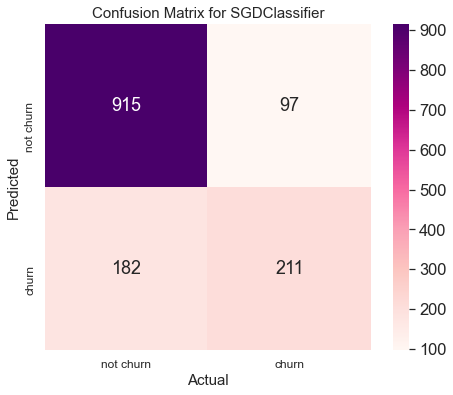

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1012
           1       0.69      0.54      0.60       393

    accuracy                           0.80      1405
   macro avg       0.76      0.72      0.73      1405
weighted avg       0.79      0.80      0.79      1405

best parameters for SGDClassifier are : 
 {'random_state': 50, 'max_iter': 100, 'alpha': 0.001}




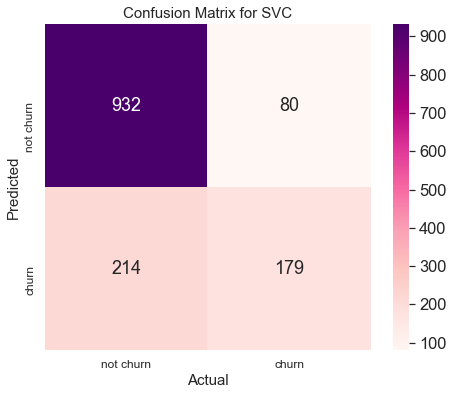

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1012
           1       0.69      0.46      0.55       393

    accuracy                           0.79      1405
   macro avg       0.75      0.69      0.71      1405
weighted avg       0.78      0.79      0.78      1405

best parameters for SVC are : 
 {'gamma': 'auto', 'C': 1}




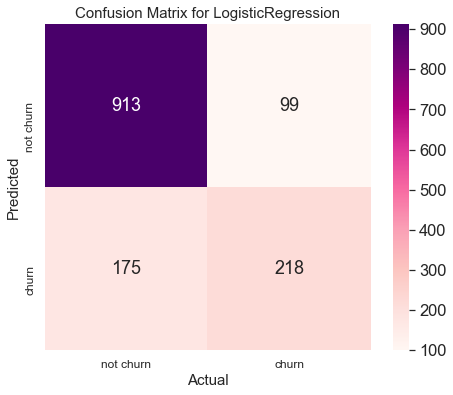

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1012
           1       0.69      0.55      0.61       393

    accuracy                           0.80      1405
   macro avg       0.76      0.73      0.74      1405
weighted avg       0.80      0.80      0.80      1405

best parameters for LogisticRegression are : 
 {'solver': 'newton-cg', 'random_state': 20, 'penalty': 'none', 'max_iter': 100, 'C': 10}




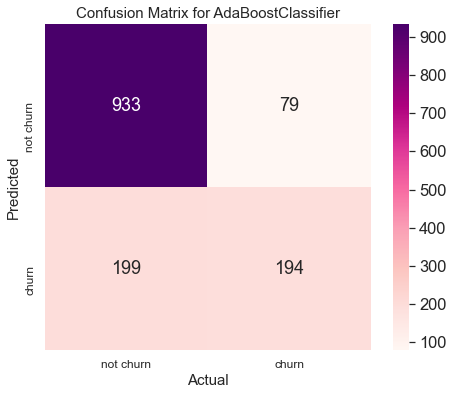

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1012
           1       0.71      0.49      0.58       393

    accuracy                           0.80      1405
   macro avg       0.77      0.71      0.73      1405
weighted avg       0.79      0.80      0.79      1405

best parameters for AdaBoostClassifier are : 
 {'random_state': 20, 'n_estimators': 2000, 'learning_rate': 0.01}




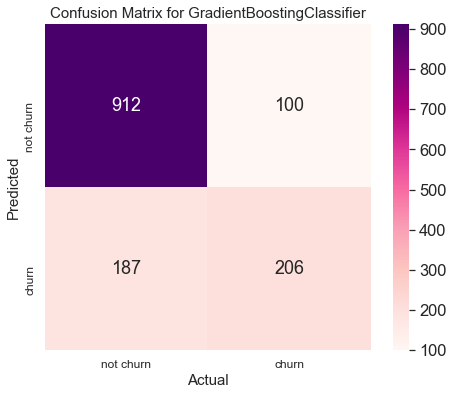

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1012
           1       0.67      0.52      0.59       393

    accuracy                           0.80      1405
   macro avg       0.75      0.71      0.73      1405
weighted avg       0.79      0.80      0.79      1405

best parameters for GradientBoostingClassifier are : 
 {'random_state': 50, 'n_estimators': 250, 'max_depth': 1, 'learning_rate': 1}




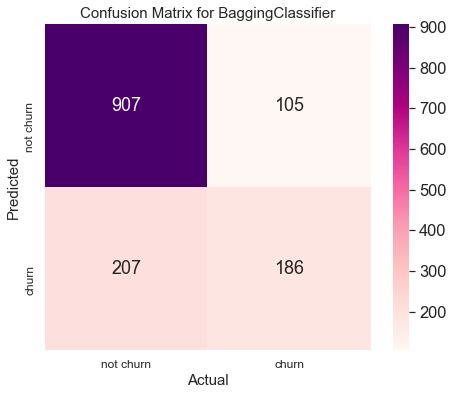

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1012
           1       0.64      0.47      0.54       393

    accuracy                           0.78      1405
   macro avg       0.73      0.68      0.70      1405
weighted avg       0.77      0.78      0.77      1405

best parameters for BaggingClassifier are : 
 {'random_state': 20, 'n_estimators': 500, 'base_estimator': DecisionTreeClassifier()}




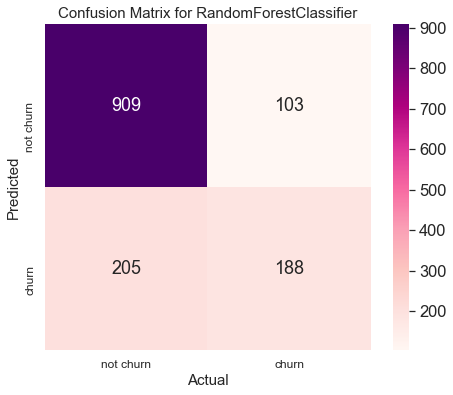

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1012
           1       0.65      0.48      0.55       393

    accuracy                           0.78      1405
   macro avg       0.73      0.69      0.70      1405
weighted avg       0.77      0.78      0.77      1405

best parameters for RandomForestClassifier are : 
 {'random_state': 8, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 27, 'max_depth': 10, 'criterion': 'gini'}




In [45]:
# retrain model after scaling data
models_with_hyperparams_tuning_train(selected_X_train,selected_y_train,selected_X_test,selected_y_test)